<h3 align="center"> London Bike Sharing Problem <hr></h3>
<br>

<h3 align="center"> Metadata: <hr></h3>

* timestamp =  Representing timestamp of bike share
* cnt =  Representing total number of bike shares
* t1 =  The temperature in celsius.
* t2 =  The apparent ("feels-like") temperature in celsius.
* hum =  The humidity level
* wind_speed =  The windspeed
* weather_code =  A categorical value indicating the weather situation

    1: clear, 2: mist/cloud, 3: light rain/snow, 4: heavy rain/hail/snow/fog

* is_holiday =  A binary value indicating whether or not the day is a holiday
* is_weekend =  A binary value indicating whether or not the day is a weekend
* season =  A numerically encoded value indicating the season

    1: spring, 2: summer, 3: fall, 4: winter

<br>

* 1 =  Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
* 2 =  Scattered clouds / few clouds
* 3 =  Broken clouds
* 4 =  Cloudy
* 7 =  Rain/ light Rain shower/ Light rain
* 10 = Rain with thunderstorm
* 26 = Snowfall
* 94 = Freezing Fog

<br>

In this dataset, cnt represents the label (the y value) our model must be trained to predict. 

The other columns are potential features (x values).

<h3 align="center"> Problem Statement <hr></h3>

* A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
* Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. 
* This bike can then be returned to another dock belonging to the same system.

* A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
* The company is finding it very difficult to sustain in the current market scenario. 
* So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

* In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 
* They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

* They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 
* Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes. 
* How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## 1. Data Analysis and exploration

In [1]:
# Data manuipulation
import numpy as np
import pandas as pd


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Modeling utilities
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor

In [2]:
# Import the dataset from the csv file into our DataFrame and view it

bikes = pd.read_csv("london_merged.csv")
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
print('The total number of records in the dataset is: ' + str(bikes.timestamp.count()) +
      ', from: ' + str(bikes.timestamp.min()) + ' to: ' + str(bikes.timestamp.max()))

The total number of records in the dataset is: 17414, from: 2015-01-04 00:00:00 to: 2017-01-03 23:00:00


In [4]:
# Informantion about each column 

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# View the shape of the dataset 
# As we can see it has 17414 rows and 18 columns 

bikes.shape

(17414, 10)

In [6]:
bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
bikes.max()

timestamp       2017-01-03 23:00:00
cnt                            7860
t1                             34.0
t2                             34.0
hum                           100.0
wind_speed                     56.5
weather_code                   26.0
is_holiday                      1.0
is_weekend                      1.0
season                          3.0
dtype: object

In [8]:
bikes.min()

timestamp       2015-01-04 00:00:00
cnt                               0
t1                             -1.5
t2                             -6.0
hum                            20.5
wind_speed                      0.0
weather_code                    1.0
is_holiday                      0.0
is_weekend                      0.0
season                          0.0
dtype: object

# 2. Preprocessing

### 2.1 Remame the columns

In [9]:
bikes.rename(index = str,
          columns = {'timestamp': 'time',
                    'cnt' : 'count bikes',
                    't1' : 'real temp',
                    't2' : 'feel temp',
                    'hum' : 'humidity (%)',
                    'wind_speed' : 'wind (km/h)',
                    'weather_code' : 'weather code',
                    'is_holiday' : 'holiday time',
                    'is_weekend' : 'weekend time',
                    'season' : 'season code'}, inplace=True)

### 2.2 Missing values

In [10]:
# Check for missing values in our dataset 
# Wow, any missing values in our dataset 
# No further cleanup of the dataset is required, as there are no rows to drop or null values to fill in

bikes.isnull().sum()

time            0
count bikes     0
real temp       0
feel temp       0
humidity (%)    0
wind (km/h)     0
weather code    0
holiday time    0
weekend time    0
season code     0
dtype: int64

### 2.3 Duplicate values

In [11]:
bikes.duplicated().value_counts()

False    17414
dtype: int64

### 2.4 Time - Day

In [12]:
# Extract month, day, and hour features from the timestamp column and then delete it 
# We do this because it will come handy whilest training some future models 

bikes['time'] = pd.to_datetime(bikes['time'])

bikes['year'] = bikes['time'].apply(lambda x: x.year)
bikes['month'] = bikes['time'].apply(lambda x: x.month)
bikes['day'] = bikes['time'].apply(lambda x: x.day)
bikes['hour'] = bikes['time'].apply(lambda x: x.hour)

bikes['day name'] = bikes['time'].apply(lambda x: x.day_name())
bikes['day num'] = bikes['time'].apply(lambda x: x.dayofweek)

bikes = bikes.drop('time', axis=1)

In [13]:
bikes.head()

,count bikes,real temp,feel temp,humidity (%),wind (km/h),weather code,holiday time,weekend time,season code,year,month,day,hour,day name,day num
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,Sunday,6
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,Sunday,6
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,Sunday,6
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,Sunday,6
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,Sunday,6


In [14]:
# Make sure we have all the months (1-12)
# The same we can do it for the day and hour etc 

bikes['month'].unique()

# bikes['day'].unique()
# bikes['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0, 0.5, 'Amount of Bikes')

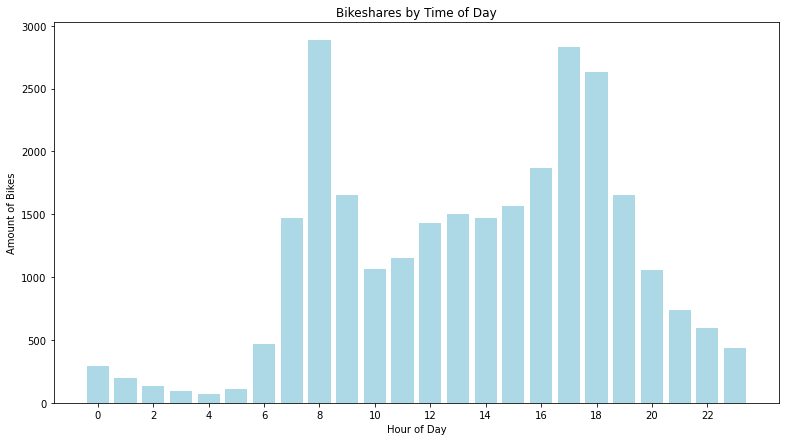

In [15]:
# Bikeshares by time of day 

bikes_hour = bikes.loc[:, ['hour', 'count bikes']]
bikes_hour_mean = bikes_hour.groupby('hour').mean()['count bikes'].round(2)

# Plot the above results 
plt.figure(figsize = (13,7))
plt.bar(bikes_hour_mean.index, bikes_hour_mean, color = 'lightblue')

plt.title('Bikeshares by Time of Day')
plt.xlabel('Hour of Day')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.ylabel('Amount of Bikes')

* In the above graph, we can observe the number of bikes, for each hour of a single day and come to a vital conclusion, about how often during a day people use bicycles.

In [ ]:
# Bikeshares by year 

bikes_year = bikes.loc[: , ['year', 'count bikes']]
bikes_year_mean = bikes_year.groupby('year').mean()['count bikes']

bikes_year_mean.plot(kind='bar', color = 'lightblue')

plt.title("Bikeshares by Years")

plt.xlabel("Years")
plt.xticks(rotation = 0)
plt.ylabel("Avg. Number of BikeShares")

* In the above graph, we can observe the number of bikes, for each year in our dataset  

In [ ]:
# Bikeshares by day of week

bikes_day = bikes.loc[: , ['day name', 'count bikes']]
bikes_day_mean = bikes_day.groupby('day name').mean()['count bikes'].round(2)

days = bikes['day name'].unique()

bikes_day_mean = bikes_day_mean.reindex(index = days)

plt.figure(figsize=(13,7))
plt.bar(bikes_day_mean.index, bikes_day_mean, color = 'lightblue')

plt.title("Bikeshares by Day of Week")
plt.xlabel("Days of Week")
plt.ylabel("Average Amount of BikeShares")

* In the above graph, we can observe the number of bikes, for each single day of a week and come to a vital conclusion, about how often during a day people use bicycles.

* If you look closely it seems that people use them according to a Gaussian Distribution

In [ ]:
# Difference between weekends and other days 

# Just don't forget what this column is before we deep into this
# weekend time: A binary value indicating whether or not the day is a weekend

weekend = bikes['weekend time'].map({ 0 : 'weekday' , 1 : 'weekend'})

bikes_weekends = bikes.groupby(weekend).mean()['count bikes']

bikes_weekends.plot(kind='bar', color = 'lightblue')

plt.xlabel("weekdays")
plt.xticks(rotation=0, ha='center')

plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by weekdays")

* In the above graph, we can observe the number of bikes, for the weekends and the rest days of a week

* As we can see, people use bicycles more during the weekday versus the weekends. 
   
   This is probably because people use them in order to go their jobs or to the supermarket, but the weekends the stay home.

In [ ]:
# Plot holidays vs working days
# "is_holiday" - boolean field - 1 holiday / 0 non holiday

holidays = bikes['weekend time'].map({ 0 : 'no holiday' , 1 : 'holiday'})

bikes_holidays = bikes.groupby(holidays).mean()['count bikes']

bikes_holidays.plot(kind='bar', color = 'lightblue')

plt.xlabel("weekdays")
plt.xticks(rotation=45,ha='right')

plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by weekdays")

* In the above graph, we can observe the number of bikes when it's holiday time and not 

* Of course, people go out more when it's holiday time that's why we see such a big difference in the above twop graphs

In [ ]:
# Plot season vs Avg. Number of BikeShares
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

#bikes['season code'].value_counts()
seasons = bikes['season code'].map({0:"spring", 1:"summer", 2:"fall", 3:"winter"})

bikes_seasons = bikes.groupby(seasons).mean()['count bikes']

bikes_seasons.plot(kind='bar', color = 'lightblue')
plt.xlabel("season")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by season")

* In the above graph, we can observe the number of bikes in the four sessions of a year 

* As it is reasonable, the summer is perfect for bicycles instead of the winter

In [ ]:
# Plot month vs Avg. Number of BikeShares
months = bikes.groupby(bikes['month']).mean()['count bikes']
                       
plt.figure(figsize=(16,5))
plt.bar(months.index, months, color = 'lightblue')

plt.xlabel("Months of the Year")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks(bikes['month'].unique())
plt.suptitle("Bikeshares by Month")

* In the above graph, we can observe the number of bikes for each month of the years

* As it is reasonable, the summer is perfect for bicycles instead of the winter once again 
    
    If you look carefully, you will see that the maximum use of bicycles is on the 6th, 7th and 8th month of the years

### 2.5 Weather

Text(0.5, 1.0, 'Bikeshares by Weather condition')

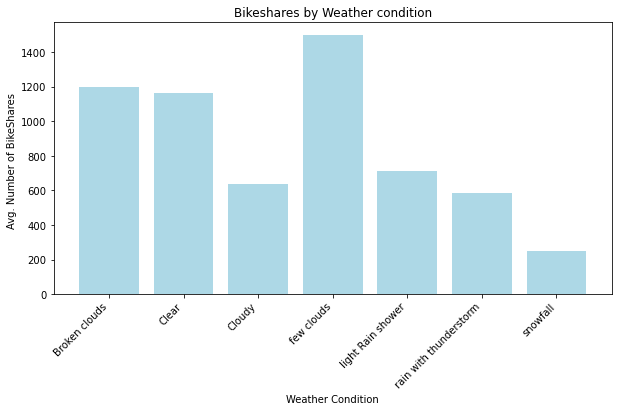

In [22]:
#Bikeshares by Weather condition
# Before we deep more into just remember the following 

# "weather code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

weather = bikes['weather code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 
                                                   4:"Cloudy", 7:"light Rain shower",
                                                   10:"rain with thunderstorm", 26:"snowfall", 
                                                   94:"Freezing Fog"})

bikes_weather = bikes.groupby(weather).mean()['count bikes'].round()


plt.figure(figsize=(10,5))
plt.bar(bikes_weather.index, bikes_weather, color = 'lightblue')
plt.xlabel("Weather Condition")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks(rotation=45,ha='right')
plt.title("Bikeshares by Weather condition")

* In the above graph, we can observe the number of bikes during each kind of weather condition

* If you look carefully, you will see that the maximum use of bicycles is when we have Broken clouds, Clear and of course Few clouds 

* Don't forget that the dataset in about London, so all these are not wrong

In [23]:
bikes.head()

,count bikes,real temp,feel temp,humidity (%),wind (km/h),weather code,holiday time,weekend time,season code,year,month,day,hour,day name,day num
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,Sunday,6
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,Sunday,6
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,Sunday,6
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,Sunday,6
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,Sunday,6


In [24]:
# The max temperature in our dataset 

maxtemp = bikes['real temp'].max()
feelmax = bikes['feel temp'].max()
print(f'The max temperature in our dataset is {maxtemp} and we would feel it like it was {feelmax}')

The max temperature in our dataset is 34.0 and we would feel it like it was 34.0


In [25]:
# The min temperature in our dataset 

mintemp = bikes['real temp'].min()
feelmin = bikes['feel temp'].min()
print(f'The min temperature in our dataset is {mintemp} and we would feel it like it was {feelmin}')

The min temperature in our dataset is -1.5 and we would feel it like it was -6.0


In [26]:
bikes['real temp'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: real temp, dtype: float64

In [27]:
bikes['feel temp'].describe()

count    17414.000000
mean        11.520836
std          6.615145
min         -6.000000
25%          6.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: feel temp, dtype: float64

### 2.6 Huminity 

In [28]:
#seleting row with max humidity
#we can see when the humidity is high bike count is high also

bikes[bikes['humidity (%)'] == bikes['humidity (%)'].max()].max()

count bikes          4386
real temp            15.0
feel temp            15.0
humidity (%)        100.0
wind (km/h)          16.0
weather code         26.0
holiday time          1.0
weekend time          1.0
season code           3.0
year                 2016
month                  12
day                    31
hour                   23
day name        Wednesday
day num                 6
dtype: object

In [29]:
# Seleting row with max humidity
# We can see when the humidity is low, bike count is low too

bikes[bikes['humidity (%)'] == bikes['humidity (%)'].min()].min()

count bikes        1845
real temp          28.5
feel temp          27.0
humidity (%)       20.5
wind (km/h)        13.0
weather code        1.0
holiday time        0.0
weekend time        0.0
season code         1.0
year               2015
month                 6
day                  30
hour                 13
day name        Tuesday
day num               1
dtype: object

### 3. Data Visualization

<AxesSubplot:xlabel='hour', ylabel='count bikes'>

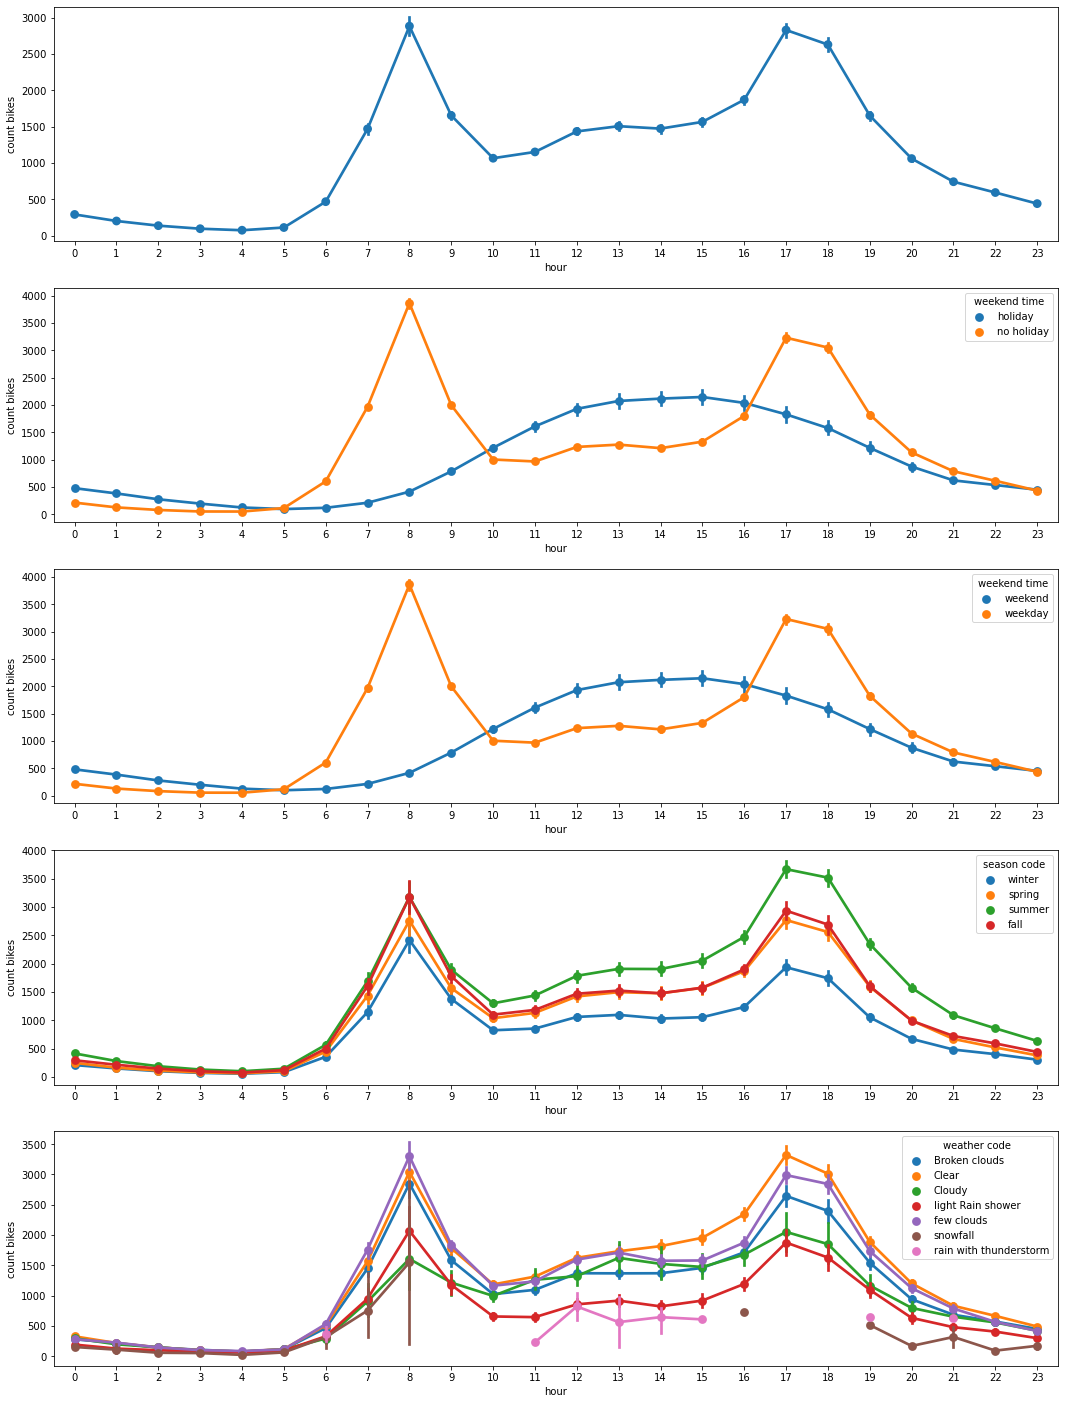

In [30]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=bikes, x='hour', y='count bikes', ax=ax1)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue=holidays, ax=ax2)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue=weekend, ax=ax3)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue=seasons, ax=ax4)
sns.pointplot(data=bikes, x='hour', y='count bikes', hue=weather, ax=ax5)

#### It is a very interesting result.

* First, when it comes to holidays, commuting time is clearly visible when it's not a holiday, while the most people use it for lunch when it's a holiday. This shows a similar trend over the weekend.
* Second, if you look at the season, it looks like the weather is good summer - fall - spring - winter.
* Thirdly, by weather, the more loans are made for the better weather, and when it rains, there are few.

However, unlike rain, when it snows, there are people who rent during rush hour.

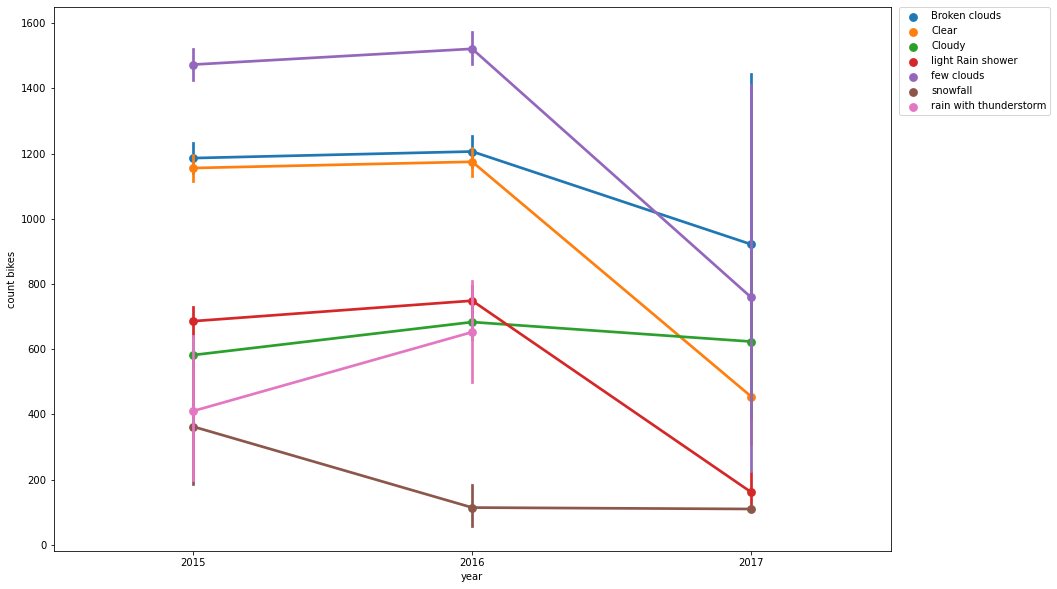

In [31]:
plt.figure(figsize=(15,10))
sns.pointplot(data = bikes, x='year', y='count bikes',hue = weather)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

<br>

I created graph that included various conditions. I can check the meaningful results.

You can see the number of sharing increasing between 7-9 and 17-19. We need to check the detailed customer, but we can infer that the amount of bicycle sharing increases during rush hour or school hours. 

We look forward to having a good effect when we come up with a target marketing plan.

sharing looks different holiday and workingday. On woringday, the amount of sharing increases during rush hour and back-to-school hours, but on holiday, it increases during lunchtime. 

I think I need a different way of marketing on holiday and workinday.

In a similar context, if you compare the days of the week, you can see the difference between weekends and weekdays. 

Similarly, services must be provided separately from weekends and weekdays.

The effect of seasonal and weather on bike sharing seems to be consistent with common sense. 

In the summer when it's good to ride a bike, there's the most sharing, and in the winter when it's not good to ride a bike, there's the least sharing. 

On bad weather,there are fewer sharing, and on good weather, there are more sharing.

In [32]:
# Selecting on numerical features from dataset

numerical_df = bikes.select_dtypes(exclude='object')

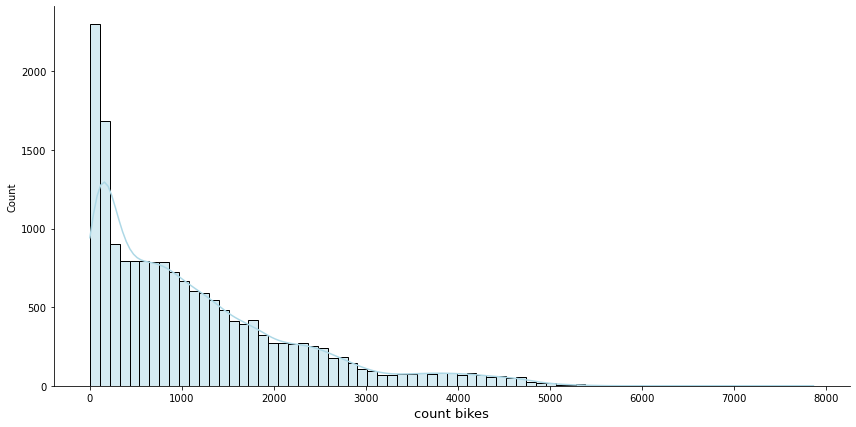

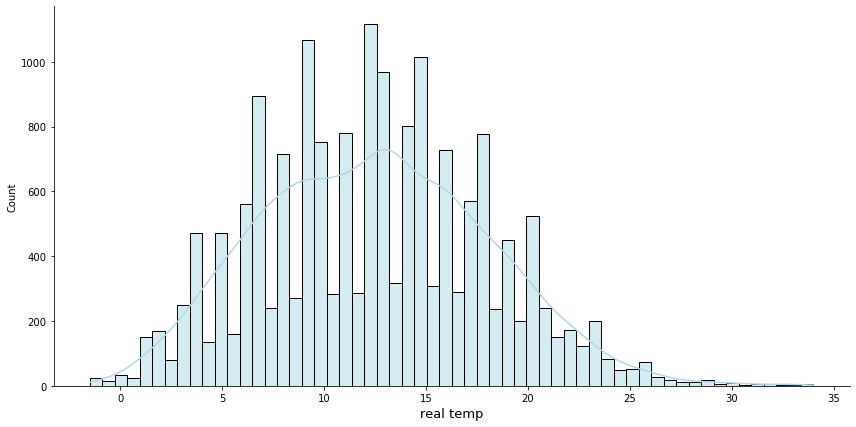

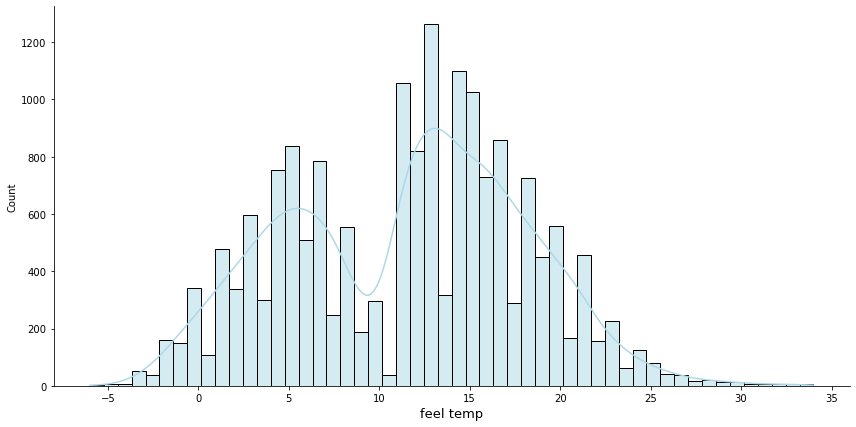

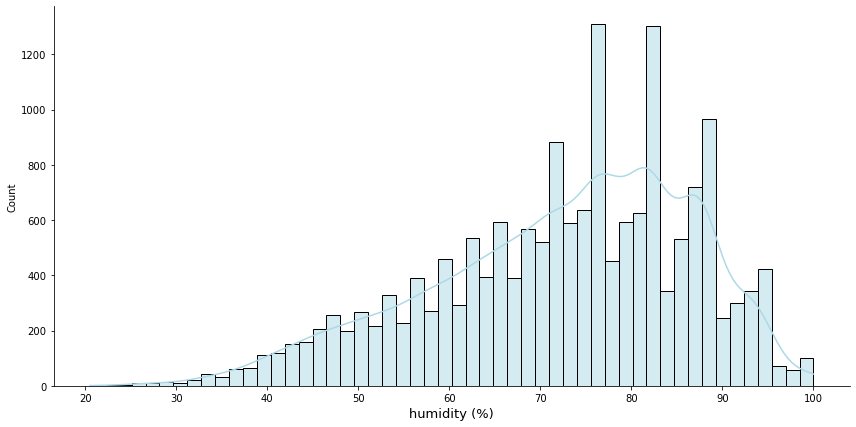

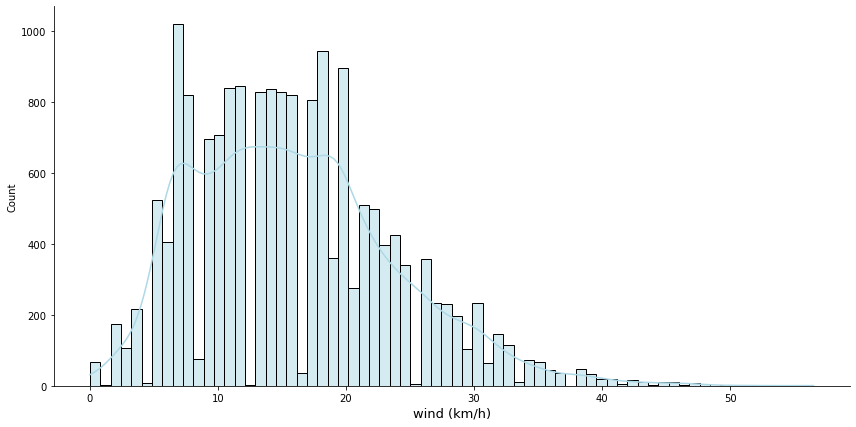

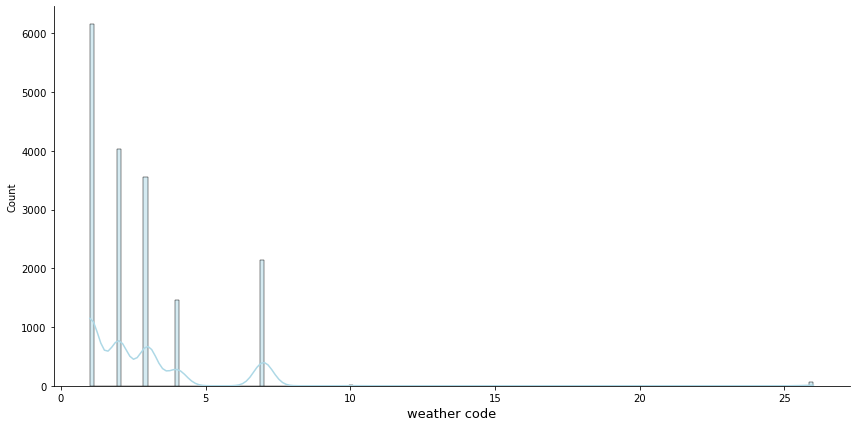

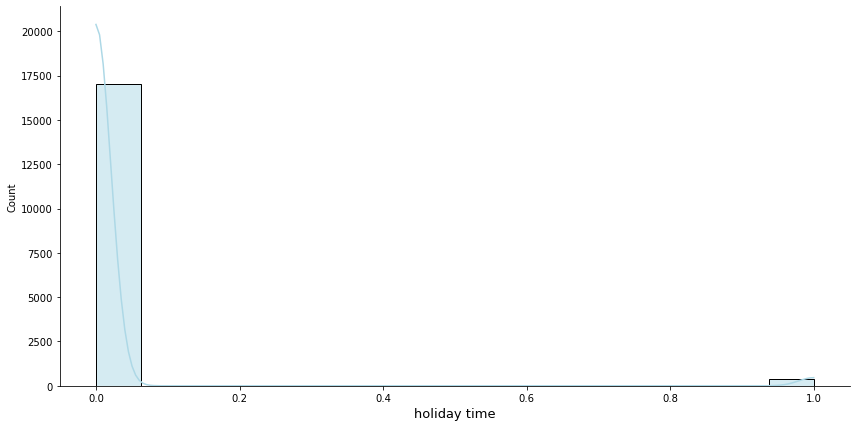

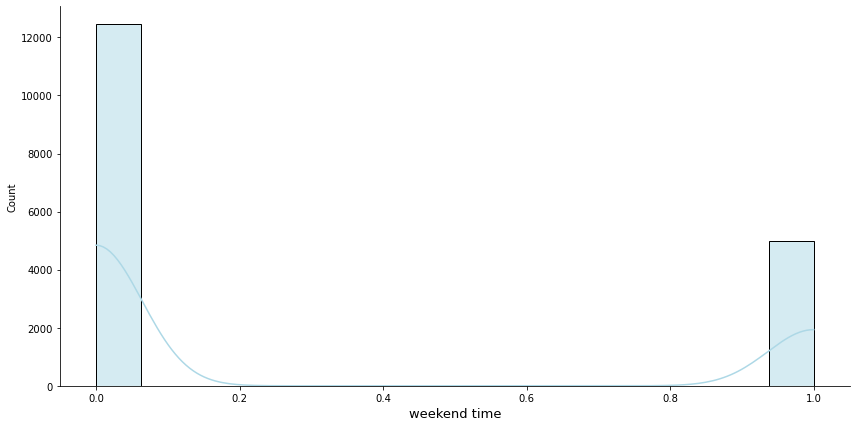

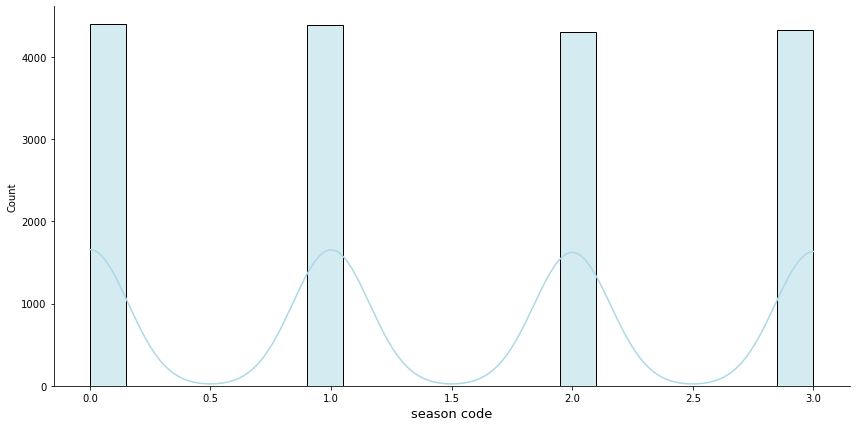

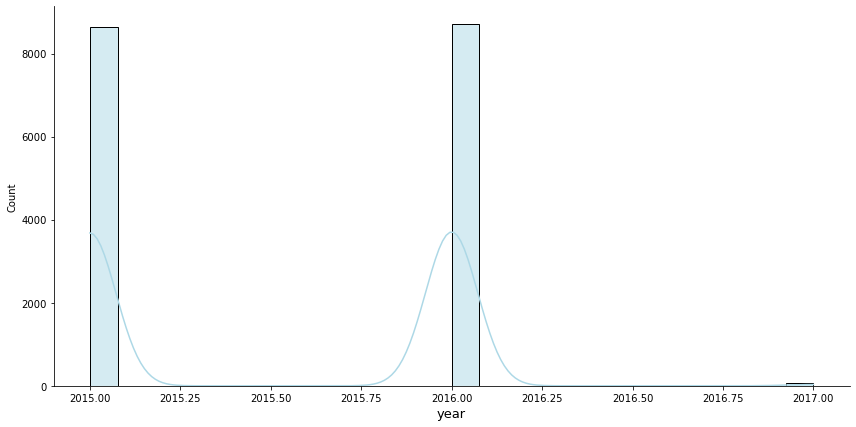

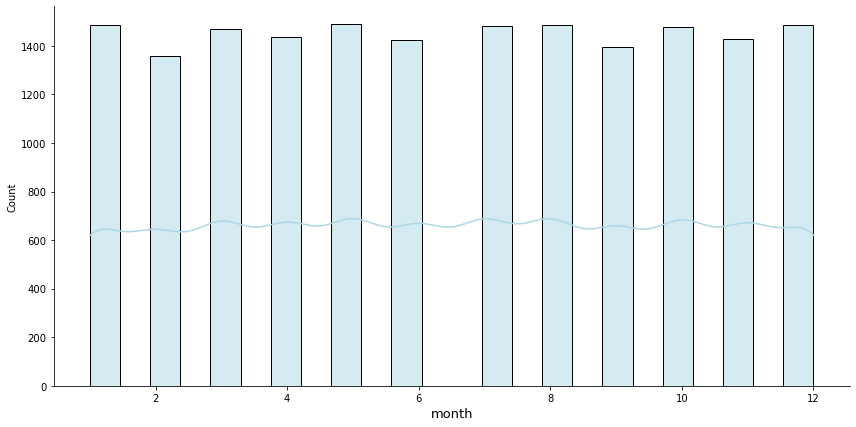

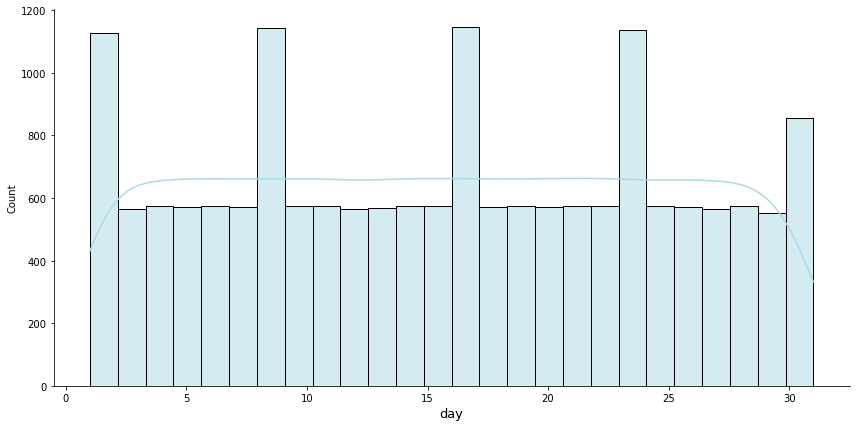

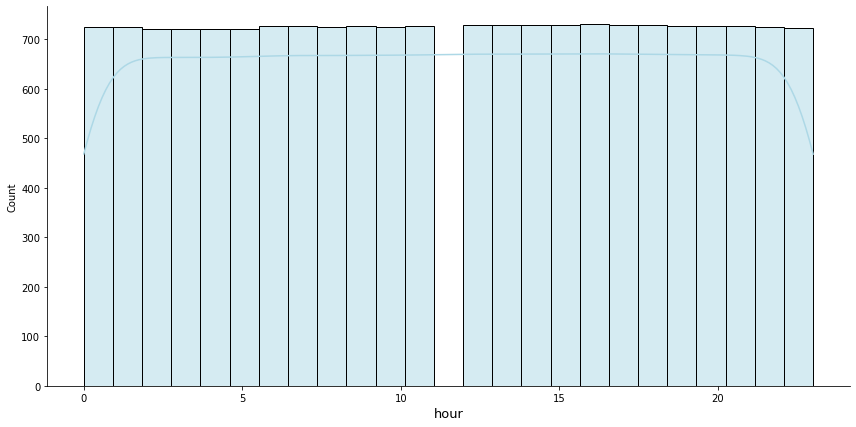

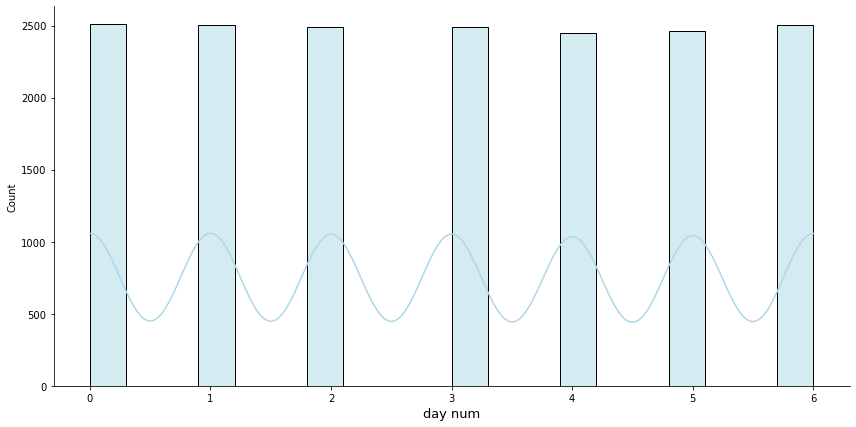

In [33]:
# Visualizing ONLY the numerical columns

for i in numerical_df:
    sns.displot(x = i, data = bikes, height = 6, aspect = 2, kde = True , color= 'lightblue')
    plt.xlabel(i, fontsize = 13)

### 3.1 Heatmap

Text(0.5, 1.1, 'Correlation Heatmap in General')

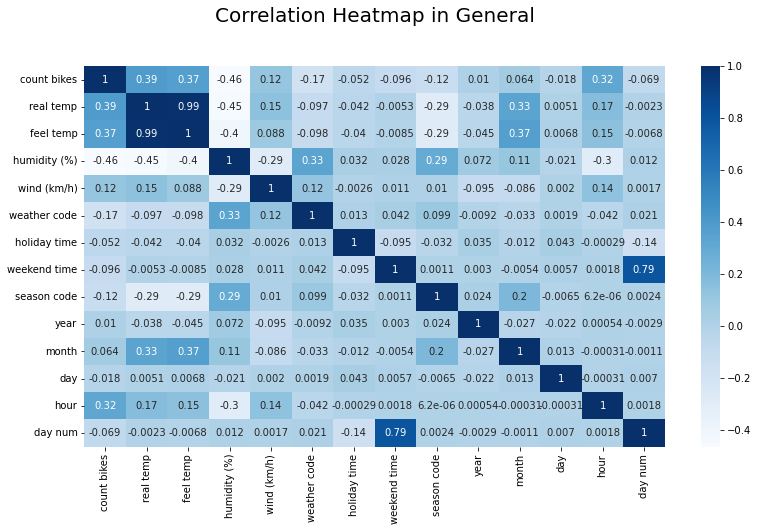

In [34]:
# View the correlation between all the values

plt.figure(figsize = (13,7))
sns.heatmap(bikes.corr(), cmap = 'Blues', annot = True)
plt.title('Correlation Heatmap in General', fontsize =20, y=1.1)

In [35]:
bikes_corr = bikes.corr()[['count bikes']]
bikes_corr

,count bikes
count bikes,1.000000
real temp,0.388798
feel temp,0.369035
humidity (%),-0.462901
wind (km/h),0.116295
weather code,-0.166633
holiday time,-0.051698
weekend time,-0.096499
season code,-0.116180
year,0.010046


Text(0.5, 1.1, 'Correlation Heatmap for a specific column')

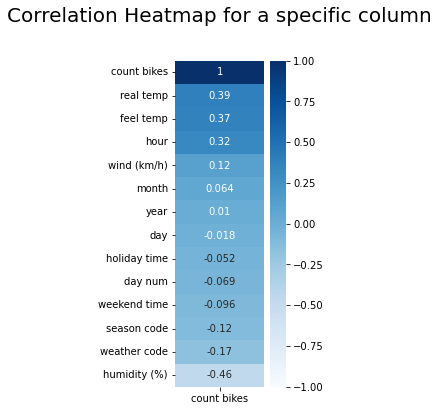

In [36]:
# for the target variable
plt.figure(figsize=(2,6))
sns.heatmap(bikes_corr.sort_values(by="count bikes", ascending=False), annot=True, cmap='Blues', vmin=-1)
plt.title('Correlation Heatmap for a specific column', fontsize =20, y=1.1)

### 4. Split the data into train and test set

In [37]:
# We want to predict the count_bikes against the rest dataset 
# First we must split the data and only then we can use standar scaler

# We have to drop both of this columns
drop_this = ['count bikes', 'day name']

# Split the data into the two new dataset (train-test)  
y = bikes['count bikes']
X = bikes.drop( drop_this, axis = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

### 4.1 Standrar Scaler

In [38]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [39]:
X_train.head()

,real temp,feel temp,humidity (%),wind (km/h),weather code,holiday time,weekend time,season code,year,month,day,hour,day num
12059,0.181744,0.296085,-0.504319,0.256961,-0.734766,-0.150362,-0.638100,-1.332138,0.963710,-0.441976,0.820824,-0.511818,-1.499755
4870,0.271297,0.371540,1.093761,0.003873,0.109930,-0.150362,1.567152,-0.438164,-1.002524,0.137222,1.161331,0.211466,1.491666
11820,0.360850,0.446994,0.155758,0.130417,-0.312418,-0.150362,-0.638100,-1.332138,0.963710,-0.441976,-0.314199,-0.367161,0.494526
14753,1.256380,1.201542,-0.087428,-2.020828,-0.734766,-0.150362,-0.638100,0.455811,0.963710,0.716420,-0.087194,-1.524415,-0.004044
4045,0.360850,0.446994,0.016794,0.446777,1.799323,-0.150362,-0.638100,-0.438164,-1.002524,-0.152377,0.707322,-1.669071,-1.499755


In [40]:
y_train

12059    4640
4870      602
11820    2509
14753     208
4045      260
         ... 
11284     100
11964    2366
5390      139
860       334
15795    1392
Name: count bikes, Length: 13931, dtype: int64

In [41]:
y_train.shape

(13931,)

In [42]:
X_train.shape

(13931, 13)

In [43]:
y_test.shape

(3483,)

In [44]:
X_test.shape

(3483, 13)

In [45]:
model_score = pd.DataFrame()

## XGB Regressor 

In [46]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

pred = xgbr.predict(X_test)

score_1 = xgbr.score(X_test, y_test)
print('The score of this model is: ',score_1)

rmse_1 = np.sqrt(mean_squared_error(y_test, pred))
print('The RMSE of this model is: %f' % (rmse_1))  

mae_1 = mean_squared_error(y_test , pred)
print('The MAE of this model is: %f' % (mae_1))

r2_1 = r2_score(y_test, pred)
print('The R^2 of this model is: %f' % (r2_1))

model_score = model_score.append(pd.DataFrame({ "R2 Score":[r2_1],
                                                "RMSE":[rmse_1],
                                                "MAE":[mae_1], 
                                                "Score":[score_1]},index = ['XGBRegressor']))

The score of this model is:  0.9664611737616757
The RMSE of this model is: 200.468608
The MAE of this model is: 40187.662869
The R^2 of this model is: 0.966461


In [47]:
# Finally try a gradient boosting model

gbr = GradientBoostingRegressor().fit(X_train, y_train) 

# Evaluate its performance 
pred1 = gbr.predict(X_test)
score_2 = gbr.score(X_test, y_test)
print('The score of this model is: ', score_2)

rmse_2 = np.sqrt(mean_squared_error(y_test, pred1))
print('The RMSE of this model is: %f' % (rmse_2))  

mae_2= mean_squared_error(y_test , pred1)
print('The MAE of this model is: %f' % (mae_2))

r2_2 = r2_score(y_test, pred1)
print('The R^2 of this model is: %f' % (r2_2))

model_score = model_score.append(pd.DataFrame({ "R2 Score":[r2_1],
                                                "RMSE":[rmse_2],
                                                "MAE":[mae_2],
                                                "Score":[score_2]}, 
                                              index = ['GradientBoostingRegressor']))

The score of this model is:  0.8847571745073465
The RMSE of this model is: 371.603156
The MAE of this model is: 138088.905857
The R^2 of this model is: 0.884757


In [48]:
rfg = RandomForestRegressor().fit(X_train, y_train)

#evaluate its performance 
pred2 = rfg.predict(X_test)

score_3 = rfg.score(X_test, y_test) 
print('The score of this model is: ', score_3)

rmse_3 = np.sqrt(mean_squared_error(y_test, pred2))
print('The RMSE of this model is: %f' % (rmse_3))  

mae_3 = mean_squared_error(y_test , pred2)
print('The MAE of this model is: %f' % (mae_3))

r2_3 = r2_score(y_test, pred2)
print('The R^2 of this model is: %f' % (r2_3))

model_score = model_score.append(pd.DataFrame({ "R2 Score":[r2_3],
                                                "RMSE":[rmse_3],
                                                "MAE":[mae_3],
                                                "Score":[score_3]}, index = ['RandomForestRegressor']))

The score of this model is:  0.9616984153607177
The RMSE of this model is: 214.230261
The MAE of this model is: 45894.604656
The R^2 of this model is: 0.961698


In [49]:
dtr = DecisionTreeRegressor().fit(X_train, y_train) 

pred3 = dtr.predict(X_test)

score_4 = dtr.score(X_test, y_test)
print('The score of this model is: ', score_4)

rmse_4 = np.sqrt(mean_squared_error(y_test, pred3))
print('The RMSE of this model is: %f' % (rmse_4))  

mae_4 = mean_squared_error(y_test , pred3)
print('The MAE of this model is: %f' % (mae_4))

r2_4 = r2_score(y_test, pred3)
print('The R^2 of this model is: %f' % (r2_4))

model_score = model_score.append(pd.DataFrame({ "R2 Score":[r2_4],
                                                "RMSE":[rmse_4],
                                                "MAE":[mae_4],
                                                "Score":[score_4]}, index = ['DecisionTreeRegressor']))

The score of this model is:  0.9344037927770237
The RMSE of this model is: 280.357262
The MAE of this model is: 78600.194373
The R^2 of this model is: 0.934404


In [50]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train, y_train)

pred4 = ls.predict(X_test)

score_5 = ls.score(X_test, y_test)
print('The score of this model is: ', score_5)

rmse_5 = np.sqrt(mean_squared_error(y_test, pred4))
print('The RMSE of this model is: %f' % (rmse_5))  

mae_5 = mean_squared_error(y_test , pred4)
print('The MAE of this model is: %f' % (mae_5))

r2_5 = r2_score(y_test, pred4)
print('The R^2 of this model is: %f' % (r2_5))

model_score = model_score.append(pd.DataFrame({ "R2 Score":[r2_5],
                                                "RMSE":[rmse_5],
                                                "MAE":[mae_5],
                                                "Score":[score_5]}, index = ['Lasso']))

The score of this model is:  0.2897269097113777
The RMSE of this model is: 922.539831
The MAE of this model is: 851079.739482
The R^2 of this model is: 0.289727


## Final Table

In [51]:
model_score

,R2 Score,RMSE,MAE,Score
XGBRegressor,0.966461,200.468608,40187.662869,0.966461
GradientBoostingRegressor,0.966461,371.603156,138088.905857,0.884757
RandomForestRegressor,0.961698,214.230261,45894.604656,0.961698
DecisionTreeRegressor,0.934404,280.357262,78600.194373,0.934404
Lasso,0.289727,922.539831,851079.739482,0.289727
